Epoch 1/887
15/15 [==============================] - 0s 12ms/step - loss: 0.2718 - accuracy: 0.5792 - val_loss: 0.2560 - val_accuracy: 0.5750
Epoch 2/887
15/15 [==============================] - 0s 3ms/step - loss: 0.2706 - accuracy: 0.5208 - val_loss: 0.2546 - val_accuracy: 0.5750
Epoch 3/887
15/15 [==============================] - 0s 3ms/step - loss: 0.2694 - accuracy: 0.5250 - val_loss: 0.2533 - val_accuracy: 0.5833
Epoch 4/887
15/15 [==============================] - 0s 3ms/step - loss: 0.2682 - accuracy: 0.5250 - val_loss: 0.2519 - val_accuracy: 0.5833
Epoch 5/887
15/15 [==============================] - 0s 4ms/step - loss: 0.2670 - accuracy: 0.5292 - val_loss: 0.2506 - val_accuracy: 0.5833
Epoch 6/887
15/15 [==============================] - 0s 4ms/step - loss: 0.2658 - accuracy: 0.5312 - val_loss: 0.2493 - val_accuracy: 0.5833
Epoch 7/887
15/15 [==============================] - 0s 3ms/step - loss: 0.2647 - accuracy: 0.5312 - val_loss: 0.2479 - val_accuracy: 0.5833
Epoch 8/887


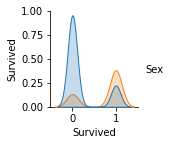

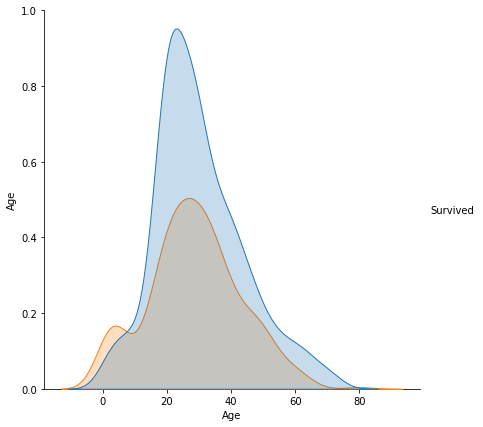

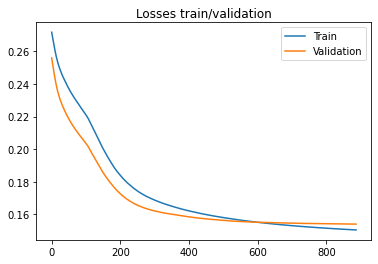

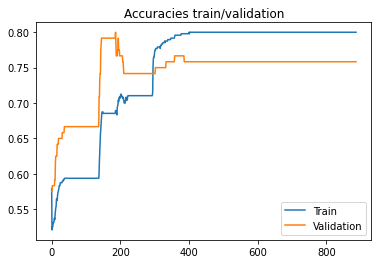

In [14]:
import keras as k
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt

data_frame = pd.read_csv("titanic.csv")
input_names = ["Age","Sex","Pclass"]
output_names = ["Survived"]

# Подготовка данных
max_age = 100
encoders = {"Age": lambda age: [age/max_age],
            "Sex": lambda gen: {"male":[0], "female":[1]}.get(gen),
            "Pclass": lambda pclass: {1:[1,0,0], 2:[0,1,0], 3:[0,0,1]}.get(pclass),
            "Survived": lambda s_value: [s_value]}

# Кодирование данных
def dataframe_to_dict(df):
  result = dict()
  for column in df.columns:
    values = data_frame[column].values
    result[column] = values
  return result

# разделение данных (на входные и выходные)
def make_supervised(df):
  raw_input_data = data_frame[input_names]
  raw_output_data = data_frame[output_names]
  return {"inputs": dataframe_to_dict(raw_input_data),
          "outputs": dataframe_to_dict(raw_output_data)}

# Кодирование в вектора
def encode(data):
  vectors = []
  for data_name, data_values in data.items():
    encoded = list(map(encoders[data_name], data_values))
    vectors.append(encoded)
  # Объединение характеристик пассажира
  formatted = []
  for vector_raw in list(zip(*vectors)):
    vector = []
    for element in vector_raw:
      for e in element:
        vector.append(e)
    formatted.append(vector)
  return formatted


supervised = make_supervised(data_frame)   
encoded_inputs = np.array(encode(supervised["inputs"]))   #[0.22, 0, 0, 0, 1]
encoded_outputs = np.array(encode(supervised["outputs"])) #[0]

# Разделяем данные на выборки
train_x = encoded_inputs[:600]
train_y = encoded_outputs[:600]

test_x = encoded_inputs[600:]
test_y = encoded_outputs[600:]

# Создание сети
model = k.Sequential()
model.add(k.layers.Dense(units=5, activation="relu"))
model.add(k.layers.Dense(units=1, activation="sigmoid"))
model.compile(loss="mse", optimizer="sgd", metrics=["accuracy"])
fit_results = model.fit( x=train_x, y=train_y, epochs=887, validation_split=0.2, verbose=1)

#использование готовых весов
# fit_results = model.fit( x=train_x, y=train_y, epochs=1, validation_split=0.2, verbose=1)
# model.load_weights("fw.h5")
# model.save_weights("fw.h5")

# Вывод
pr_test = model.predict(test_x)
real_data = data_frame.iloc[600:][input_names+output_names]
real_data["PSurvived"] = pr_test
print(real_data)

# Визуализация 
data_corr_gender = pd.DataFrame(data_frame, columns=["Survived", "Sex"])
data_corr_gender.dropna(inplace=True)
sns.pairplot(data_corr_gender, hue="Sex", height=2)
plt.show()

print(" ")

data_corr_age = pd.DataFrame(data_frame, columns=["Survived", "Age"])
data_corr_age.dropna(inplace=True)
sns.pairplot(data_corr_age, hue="Survived", height=6)
plt.show()

print(" ")

plt.title("Losses train/validation")
plt.plot(fit_results.history["loss"], label="Train")
plt.plot(fit_results.history["val_loss"], label="Validation")
plt.legend()
plt.show()

print(" ")

plt.title("Accuracies train/validation")
plt.plot(fit_results.history["accuracy"], label="Train")
plt.plot(fit_results.history["val_accuracy"], label="Validation")
plt.legend()
plt.show()
